In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
orders = pd.read_csv("D:/PYTHON/WS CUBE TECH/Datasets/Pizza+Place+Sales/pizza_sales/orders.csv")
orders.head()

order_details = pd.read_csv("D:/PYTHON/WS CUBE TECH/Datasets/Pizza+Place+Sales/pizza_sales/order_details.csv")
order_details.head()

pizza_types = pd.read_csv("D:/PYTHON/WS CUBE TECH/Datasets/Pizza+Place+Sales/pizza_sales/pizza_types.csv", encoding='unicode_escape')
pizza_types.head()

pizza = pd.read_csv("D:/PYTHON/WS CUBE TECH/Datasets/Pizza+Place+Sales/pizza_sales/pizzas.csv")
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [29]:
# Changing datatypes of date and time column
orders["date"] = orders["date"].astype('datetime64[ns]')
orders["time"] = orders["time"].astype('datetime64[ns]')

orders.head()

,order_id,date,time,weekday,order_time(hr),times_of_the_day
0,1,2015-01-01,2023-10-13 11:38:36,Thursday,11,morning
1,2,2015-01-01,2023-10-13 11:57:40,Thursday,11,morning
2,3,2015-01-01,2023-10-13 12:12:28,Thursday,12,afternoon
3,4,2015-01-01,2023-10-13 12:16:31,Thursday,12,afternoon
4,5,2015-01-01,2023-10-13 12:21:30,Thursday,12,afternoon


In [4]:
# total sales
total_df = pd.merge(left = order_details, right = pizza, on = "pizza_id", how = "inner")
total_df["sales"] = total_df["quantity"] * total_df["price"]
total_df["sales"].sum() 

817860.0499999999

In [5]:
# identify which pizza is ordered the most
hot_selling = pd.merge(left = total_df, right = pizza_types, on="pizza_type_id", how = "inner")
gb = hot_selling.groupby("name").agg({"quantity": "count"})
gb["quantity"].idxmax()


'The Classic Deluxe Pizza'

In [6]:
# Identify which pizza is generating more sales
gb1 = hot_selling.groupby("name").agg({"sales":"sum"})
gb1.sales.idxmax()

'The Thai Chicken Pizza'

In [7]:
# Identify which pizza category is hotselling.
gb2 = hot_selling.groupby("category").agg({"quantity": "count"})
gb2.quantity.idxmax()

'Classic'

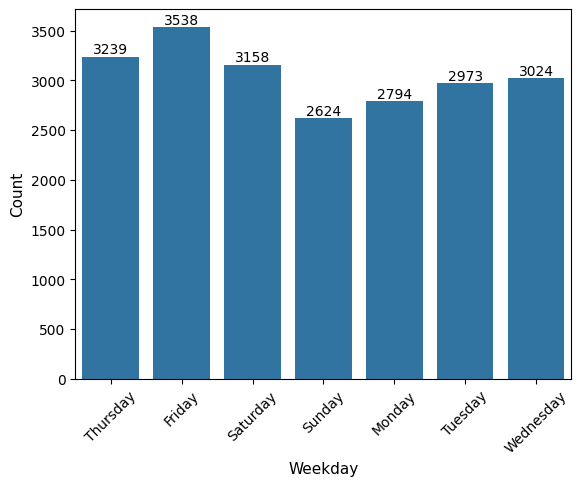

In [8]:
# identify which day of the week we are getting the hight orderes
orders["weekday"] = orders.date.dt.strftime("%A")


ax = sns.countplot(data = orders, x = "weekday")
ax.bar_label(ax.containers[0])
plt.xticks(rotation= 45)
plt.xlabel("Weekday", fontsize= 11,)
plt.ylabel("Count", fontsize= 11,)
           
plt.show()

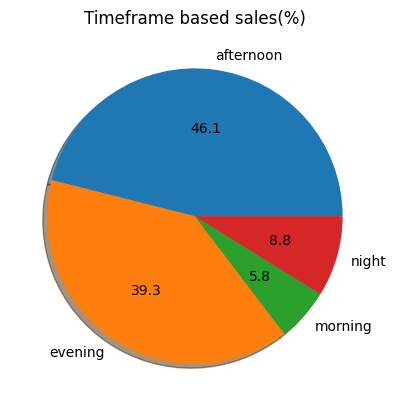

In [28]:
# Identify at which time of the day, people are ordering more pizzas. 
orders["order_time(hr)"] = orders.time.dt.strftime("%H")

orders["order_time(hr)"]=orders["order_time(hr)"].astype("Int64")

orders.loc[(orders["order_time(hr)"] <12), "times_of_the_day"] = "morning"
orders.loc[(orders["order_time(hr)"] >=12) &(orders["order_time(hr)"] <17 ), "times_of_the_day"] = "afternoon"
orders.loc[(orders["order_time(hr)"] >=17) & (orders["order_time(hr)"] <21), "times_of_the_day"] = "evening"
orders.loc[(orders["order_time(hr)"] >=21), "times_of_the_day"] = "night"

gb4 = orders.groupby("times_of_the_day").agg({"order_id": "count"})
plt.pie(gb4.order_id, labels=gb4.index, autopct="%1.1f", shadow=True)
plt.title("Timeframe based sales(%)")
plt.show()

12
9


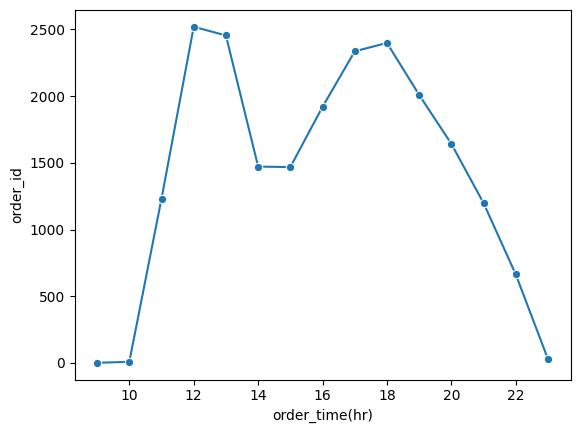

In [24]:
# identify the time at which we are getting high orders and the time at which we are getting the lowest orders
gb5 = orders.groupby("order_time(hr)").agg({"order_id": "count"})
highest_order_time = gb5["order_id"].idxmax()
lowest_order_time = gb5["order_id"].idxmin()
print(highest_order_time)
print(lowest_order_time)
gb5

sns.lineplot(data = gb5, x = gb5.index, y = gb5["order_id"], marker="o")

plt.show()